##**STOCK PRICE PREDICTION**


**Dataset**: 

[Dataset](https://www.kaggle.com/tamilselvanarjunan/stockprices)

**ABSTRACT**


A stock's price indicates its current value to buyers and sellers.
The stock's intrinsic value may be higher or lower.
The goal of the stock investor is to identify stocks that are currently undervalued by the market.

There is a common saying: “Don’t judge a book by its cover.” An equally valid truism for the investor could be: “Don’t judge a stock by its share price.” Many people incorrectly assume that a stock with a low dollar price is cheap, while another one with a heftier price is expensive.

**About The Project**

In this project I have built a model(LSTM) which is going to  predict the stock price of dataset taken.This Dataset has a shape of 10,000 rows and 10 columns of 19 Years past data and features are **date,close,open,high,low,volume,dividends,closeunadj** It has the data of the companies like XOM(ExxonMobil) and WMT(Walmart) . 

**WHY LSTM IS CHOOSEN? (LONG SHORT TERM MEMORY)** 

LSTMs are widely used for sequence prediction problems and have proven to be extremely effective. The reason they work so well is because LSTM is able to store past information that is important, and forget the information that is not. 

##**STEPS FOLLOWED**


1.   Data Collection
2.   Data Preprocessing
3.   Built LSTM model
4.   Predicted the test data and plotted the output






**Import the Required Libaries**

*   **Math** libary provides us the access to some mathematical functions.
*   **Numpy** libary provides us access to work with arrays.
*   **Pandas** package provides us access to aide or work with loading and    manipulating with the data.
*   **Sklearn** package provides us a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction
*  **MinMax Scalar** it normalizes the input features/variables features will be transformed into the range [0,1]
*  **keras** it is used for  building Neural Networks
*  **Sequential** is used for initializing the neural network
*  **Dense** is used for adding a densely connected neural network layer.
*  **Droput** is used for adding dense layers which prevents the overfitting.
*  **matplotlib** is a libary used for plotting and data visualization.



In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,LSTM,Dropout
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
plt.style.use('fivethirtyeight')

**Importing the Dataset from drive**

#Data Collection


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/SHARADAR-Stock.csv"
df = pd.read_csv(path)

**Displaying the dataset**

In [4]:
df

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
0,XOM,9/21/2018,85.01,85.43,84.52,85.17,26196749,0.0,85.17,9/21/2018
1,XOM,9/20/2018,84.86,85.34,84.54,84.82,10621638,0.0,84.82,9/20/2018
2,XOM,9/19/2018,83.64,84.77,83.64,84.63,9787326,0.0,84.63,9/19/2018
3,XOM,9/18/2018,83.90,84.13,83.45,83.63,8799790,0.0,83.63,9/18/2018
4,XOM,9/17/2018,83.00,83.61,82.99,83.41,7898451,0.0,83.41,9/17/2018
...,...,...,...,...,...,...,...,...,...,...
9995,WMT,9/24/1999,46.56,47.50,46.19,46.50,6339600,0.0,46.50,2/11/2018
9996,WMT,9/23/1999,47.63,47.81,46.63,46.69,5696900,0.0,46.69,2/11/2018
9997,WMT,9/22/1999,45.81,47.69,45.56,47.25,5396500,0.0,47.25,2/11/2018
9998,WMT,9/21/1999,45.00,46.06,44.75,45.75,5844200,0.0,45.75,2/11/2018


**Checking the shape of the dataset**

In [5]:
df.shape

(10000, 10)

**Knowing the types of the features**

In [6]:
df.dtypes

ticker          object
date            object
open           float64
high           float64
low            float64
close          float64
volume           int64
dividends      float64
closeunadj     float64
lastupdated     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ticker       10000 non-null  object 
 1   date         10000 non-null  object 
 2   open         10000 non-null  float64
 3   high         10000 non-null  float64
 4   low          10000 non-null  float64
 5   close        10000 non-null  float64
 6   volume       10000 non-null  int64  
 7   dividends    10000 non-null  float64
 8   closeunadj   10000 non-null  float64
 9   lastupdated  10000 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 781.4+ KB


#Data Prepocessing

**Checking if there are any NULL values in the dataset**

In [8]:
df.isnull().values.any()

False

**Printing the Feature names**

In [9]:
print(df.columns)

Index(['ticker', 'date', 'open', 'high', 'low', 'close', 'volume', 'dividends',
       'closeunadj', 'lastupdated'],
      dtype='object')


In [10]:
for ticker in df:
    print(df[ticker].unique())

['XOM' 'WMT']
['9/21/2018' '9/20/2018' '9/19/2018' ... '1/5/1998' '1/2/1998'
 '12/31/1997']
[85.01 84.86 83.64 ... 62.5  57.19 54.81]
[85.43 85.34 84.77 ... 56.44 57.88 51.69]
[84.52 84.54 83.64 ... 64.63 63.19 56.44]
[85.17 84.82 84.63 ... 56.75 54.88 46.31]
[26196749 10621638  9787326 ...  5396500  5844200  3053600]
[0.    0.82  0.77  0.75  0.73  0.69  0.63  0.57  0.47  0.44  0.42  0.4
 0.35  0.32  0.29  0.27  0.25  0.23  0.01  0.22  0.205 0.52  0.51  0.5
 0.49  0.48  0.398 0.365 0.302 0.273 0.237 0.168 0.15  0.13  0.09  0.075
 0.07  0.06  0.05 ]
[85.17 84.82 84.63 ... 56.75 54.88 46.31]
['9/21/2018' '9/20/2018' '9/19/2018' '9/18/2018' '9/17/2018' '9/14/2018'
 '9/13/2018' '9/12/2018' '9/11/2018' '9/10/2018' '9/7/2018' '9/6/2018'
 '9/5/2018' '9/4/2018' '8/31/2018' '8/28/2018' '8/22/2018' '8/21/2018'
 '8/20/2018' '8/17/2018' '8/16/2018' '8/15/2018' '8/14/2018' '8/13/2018'
 '8/10/2018' '8/9/2018' '8/8/2018' '8/7/2018' '8/6/2018' '8/3/2018'
 '8/2/2018' '8/1/2018' '7/31/2018' '7/30/2018' 

**Dropping the Features which are not useful**

In [11]:
df.drop(['dividends','lastupdated','ticker'],axis=1)

,date,open,high,low,close,volume,closeunadj
0,9/21/2018,85.01,85.43,84.52,85.17,26196749,85.17
1,9/20/2018,84.86,85.34,84.54,84.82,10621638,84.82
2,9/19/2018,83.64,84.77,83.64,84.63,9787326,84.63
3,9/18/2018,83.90,84.13,83.45,83.63,8799790,83.63
4,9/17/2018,83.00,83.61,82.99,83.41,7898451,83.41
...,...,...,...,...,...,...,...
9995,9/24/1999,46.56,47.50,46.19,46.50,6339600,46.50
9996,9/23/1999,47.63,47.81,46.63,46.69,5696900,46.69
9997,9/22/1999,45.81,47.69,45.56,47.25,5396500,47.25
9998,9/21/1999,45.00,46.06,44.75,45.75,5844200,45.75


In [12]:
df.date=pd.to_datetime(df.date)
df

,ticker,date,open,high,low,close,volume,dividends,closeunadj,lastupdated
0,XOM,2018-09-21,85.01,85.43,84.52,85.17,26196749,0.0,85.17,9/21/2018
1,XOM,2018-09-20,84.86,85.34,84.54,84.82,10621638,0.0,84.82,9/20/2018
2,XOM,2018-09-19,83.64,84.77,83.64,84.63,9787326,0.0,84.63,9/19/2018
3,XOM,2018-09-18,83.90,84.13,83.45,83.63,8799790,0.0,83.63,9/18/2018
4,XOM,2018-09-17,83.00,83.61,82.99,83.41,7898451,0.0,83.41,9/17/2018
...,...,...,...,...,...,...,...,...,...,...
9995,WMT,1999-09-24,46.56,47.50,46.19,46.50,6339600,0.0,46.50,2/11/2018
9996,WMT,1999-09-23,47.63,47.81,46.63,46.69,5696900,0.0,46.69,2/11/2018
9997,WMT,1999-09-22,45.81,47.69,45.56,47.25,5396500,0.0,47.25,2/11/2018
9998,WMT,1999-09-21,45.00,46.06,44.75,45.75,5844200,0.0,45.75,2/11/2018


**Displaying only the date_day from date**

In [13]:
date_day=df['date'].dt.day
print(date_day)

0       21
1       20
2       19
3       18
4       17
        ..
9995    24
9996    23
9997    22
9998    21
9999    20
Name: date, Length: 10000, dtype: int64


**Displaying only year from date**

In [14]:
k=df['date'].dt.year
print(k)

0       2018
1       2018
2       2018
3       2018
4       2018
        ... 
9995    1999
9996    1999
9997    1999
9998    1999
9999    1999
Name: date, Length: 10000, dtype: int64


**visualizing the data of closing price data**

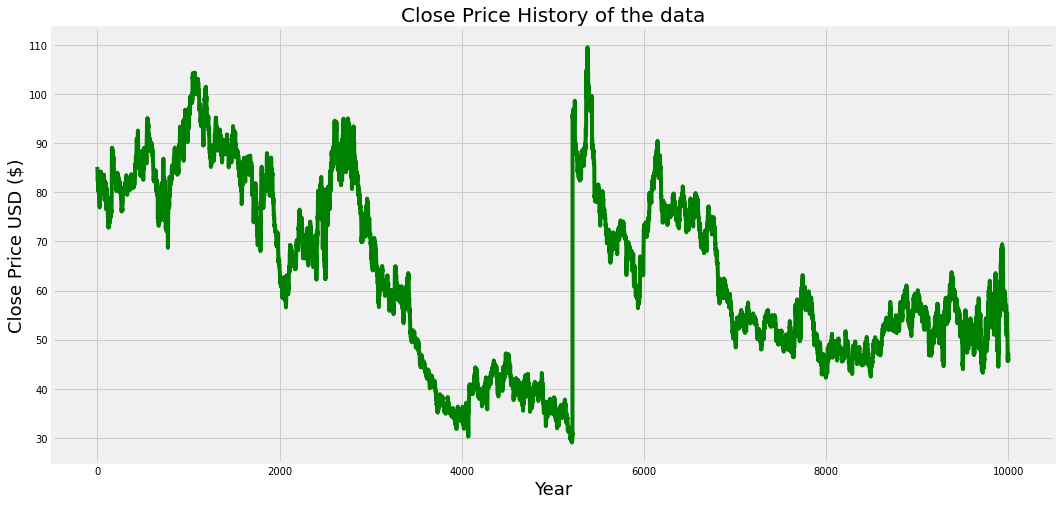

In [15]:

plt.figure(figsize=(16,8))
plt.title('Close Price History of the data',fontsize=20)
plt.plot(df['close'],color='green')
plt.xlabel('Year',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

**Creating a dataframe with only close**

In [16]:

data=df.filter(['close'])


**Converting the data to numpy array**

In [17]:
dataset=data.values

**Get the number of rows to train the model**

In [18]:
training_data_len=math.ceil(len(dataset)*0.7)
training_data_len

7000

**Scaling the data**

In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
scale_data=scaler.fit_transform(dataset)

scale_data

array([[0.69708641],
       [0.69273778],
       [0.69037709],
       ...,
       [0.22594272],
       [0.20730571],
       [0.21277257]])

**Creating the data**

In [20]:
#creating the training dataset and scaled training dataset
train_data=scale_data[0:training_data_len,:]

#split the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range (70,len(train_data)):
  x_train.append(train_data[i-70:i,0])
  y_train.append(train_data[i,0])
  if i<=71:
    print(x_train)
    print(y_train)
    print()

[array([0.69708641, 0.69273778, 0.69037709, 0.67795241, 0.67521898,
       0.66913089, 0.66167609, 0.67174008, 0.66838541, 0.65409704,
       0.655588  , 0.63856619, 0.6497484 , 0.636454  , 0.63496304,
       0.63918743, 0.64353606, 0.63632975, 0.63782071, 0.62812947,
       0.62142014, 0.63235385, 0.61831397, 0.61806548, 0.61123191,
       0.60800149, 0.59483134, 0.61185314, 0.61495931, 0.62564453,
       0.63682674, 0.64192085, 0.64863018, 0.63508728, 0.63533578,
       0.63173262, 0.63769647, 0.6516121 , 0.65446978, 0.65670622,
       0.68553147, 0.67745543, 0.67024911, 0.65024539, 0.65024539,
       0.65782444, 0.66043362, 0.66155184, 0.66378828, 0.67397652,
       0.66627322, 0.66503075, 0.67832515, 0.6688824 , 0.66180034,
       0.66155184, 0.66068211, 0.65471827, 0.66677021, 0.65732745,
       0.65409704, 0.64080263, 0.62962043, 0.64999689, 0.62899919,
       0.63844195, 0.64154811, 0.64303908, 0.64105113, 0.65633348])]
[0.651612101633845]

[array([0.69708641, 0.69273778, 0.6903

In [21]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)


In [22]:
#reshaping the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape


(6930, 70, 1)

#Building the LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 70, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 70, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 25)                1275      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 26        
Total params: 31,901
Trainable params: 31,901
Non-trainable params: 0
_________________________________________________________________


**Compiling the model**

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error',)

#Training the model

In [34]:
#train the model
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
217/217 [==============================] - 15s 67ms/step - loss: 4.0423e-04
Epoch 2/100
217/217 [==============================] - 14s 66ms/step - loss: 4.1046e-04
Epoch 3/100
217/217 [==============================] - 14s 66ms/step - loss: 3.9236e-04
Epoch 4/100
217/217 [==============================] - 14s 66ms/step - loss: 3.6497e-04
Epoch 5/100
217/217 [==============================] - 14s 67ms/step - loss: 3.5588e-04
Epoch 6/100
217/217 [==============================] - 14s 66ms/step - loss: 3.6705e-04
Epoch 7/100
217/217 [==============================] - 14s 66ms/step - loss: 3.7289e-04
Epoch 8/100
217/217 [==============================] - 14s 67ms/step - loss: 3.6872e-04
Epoch 9/100
217/217 [==============================] - 14s 66ms/step - loss: 3.7857e-04
Epoch 10/100
217/217 [==============================] - 14s 67ms/step - loss: 3.8131e-04
Epoch 11/100
217/217 [==============================] - 15s 68ms/step - loss: 3.4301e-04
Epoch 12/100
217/217 [========

In [35]:
#create the testing dataset 
test_data=scale_data[training_data_len -70:,:]

#create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(70,len(test_data)):
  x_test.append(test_data[i-70:i,0])


In [36]:
#convert the data to a numpy array
x_test=np.array(x_test)

In [37]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

**Get the models predicted price values**

In [38]:
#get the  models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

#Evaluating the model

In [39]:
#evaluate the model by RMSE
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.31753453758748384

# Plotting the Graph

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


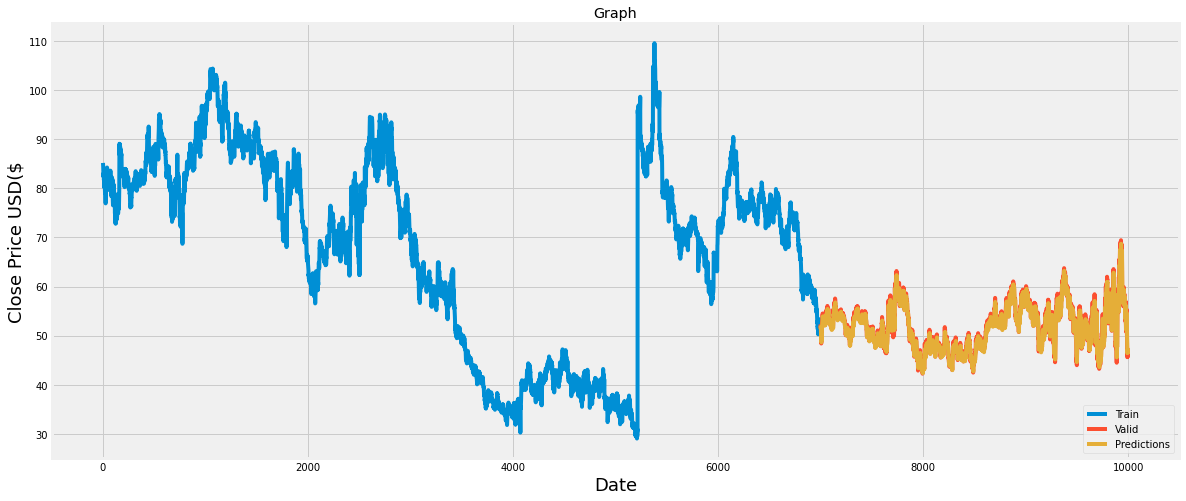

In [40]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions

#visulaization of data
plt.figure(figsize=(18,8))
plt.title('Graph')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($',fontsize=18)
plt.plot(train['close'])
#plt.xlim(1990,2020)
plt.plot(valid[['close','predictions']])
plt.legend(['Train','Valid','Predictions'],loc='lower right')
plt.show()



**Showing the validation and predicted prices**

In [41]:
valid

,close,predictions
7000,52.30,52.125294
7001,51.79,52.034550
7002,51.55,51.611668
7003,51.92,51.354618
7004,49.98,51.520721
...,...,...
9995,46.50,46.537224
9996,46.69,46.629658
9997,47.25,46.758827
9998,45.75,47.172478
